In [50]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [51]:
!kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data
!unzip unsupervised-learning-on-country-data.zip

Dataset URL: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
License(s): MIT
unsupervised-learning-on-country-data.zip: Skipping, found more recently modified local copy (use --force to force download)


"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [52]:
import os
from zipfile import ZipFile

# Download the dataset
os.system('kaggle datasets download -d rohan0301/unsupervised-learning-on-country-data')

# Unzip the downloaded dataset
with ZipFile('unsupervised-learning-on-country-data.zip', 'r') as zip_ref:
    zip_ref.extractall()


In [53]:
# Load the dataset
df = pd.read_csv('Country-data.csv')

# Display the first few rows of the dataset
print(df.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [54]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with any missing values
df_cleaned = df.dropna()

# Check for duplicates
duplicates = df_cleaned.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display the cleaned dataset
print(df_cleaned.head())

Missing values in each column:
 country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64
Number of duplicate rows: 0
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [55]:
# Rename all columns in df_cleaned
df_cleaned.columns = ['Country', 'Child Mortality', 'Exports', 'Health', 'Imports', 'Income', 'Inflation', 'Life Expectancy', 'Total Fertility', 'GDP per capita']

# Display the renamed dataframe
print(df_cleaned.head())

               Country  Child Mortality  Exports  Health  Imports  Income  \
0          Afghanistan             90.2     10.0    7.58     44.9    1610   
1              Albania             16.6     28.0    6.55     48.6    9930   
2              Algeria             27.3     38.4    4.17     31.4   12900   
3               Angola            119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda             10.3     45.5    6.03     58.9   19100   

   Inflation  Life Expectancy  Total Fertility  GDP per capita  
0       9.44             56.2             5.82             553  
1       4.49             76.3             1.65            4090  
2      16.10             76.5             2.89            4460  
3      22.40             60.1             6.16            3530  
4       1.44             76.8             2.13           12200  


In [56]:
# Get the summary statistics of the cleaned dataset
summary_stats = df_cleaned.describe()
print(summary_stats)

       Child Mortality     Exports      Health     Imports         Income  \
count       167.000000  167.000000  167.000000  167.000000     167.000000   
mean         38.270060   41.108976    6.815689   46.890215   17144.688623   
std          40.328931   27.412010    2.746837   24.209589   19278.067698   
min           2.600000    0.109000    1.810000    0.065900     609.000000   
25%           8.250000   23.800000    4.920000   30.200000    3355.000000   
50%          19.300000   35.000000    6.320000   43.300000    9960.000000   
75%          62.100000   51.350000    8.600000   58.750000   22800.000000   
max         208.000000  200.000000   17.900000  174.000000  125000.000000   

        Inflation  Life Expectancy  Total Fertility  GDP per capita  
count  167.000000       167.000000       167.000000      167.000000  
mean     7.781832        70.555689         2.947964    12964.155689  
std     10.570704         8.893172         1.513848    18328.704809  
min     -4.210000        3

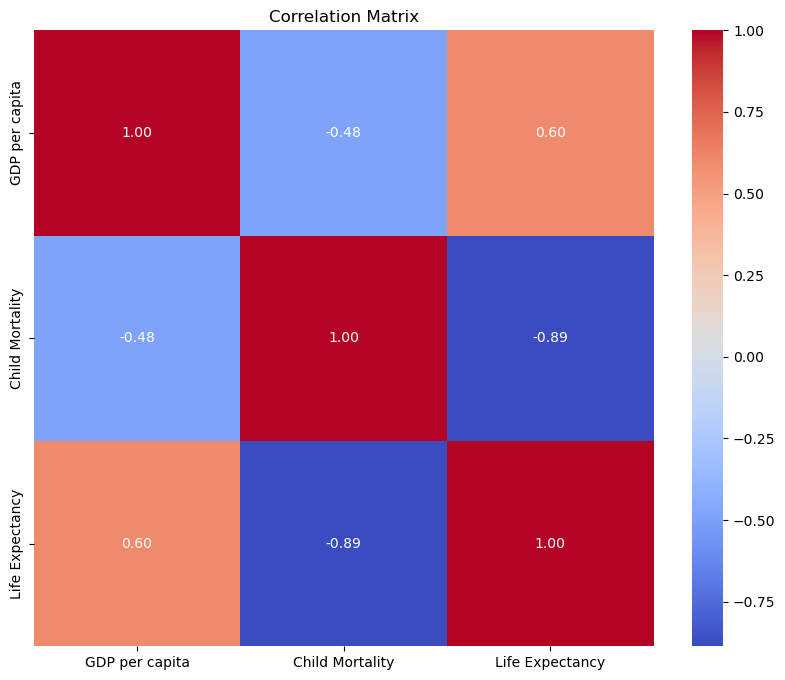

In [57]:
# Calculate the correlation matrix
correlation_matrix = df_cleaned[['GDP per capita', 'Child Mortality', 'Life Expectancy']].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

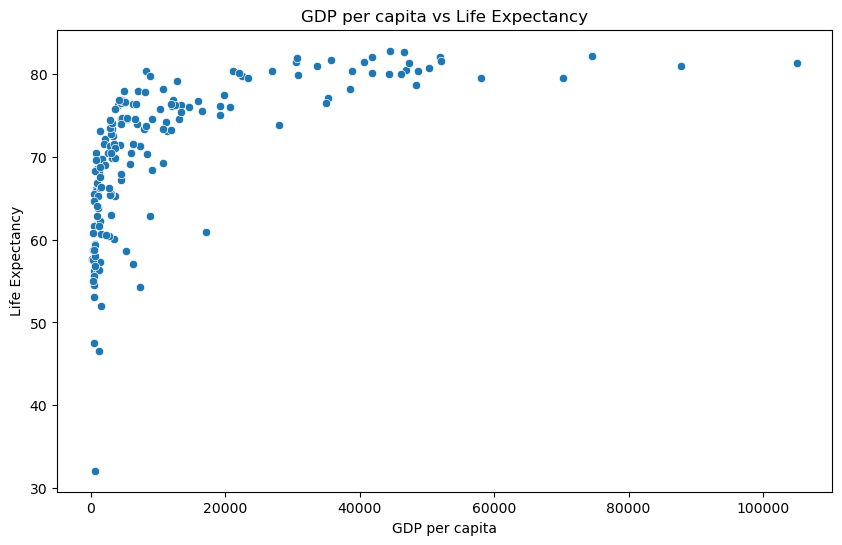

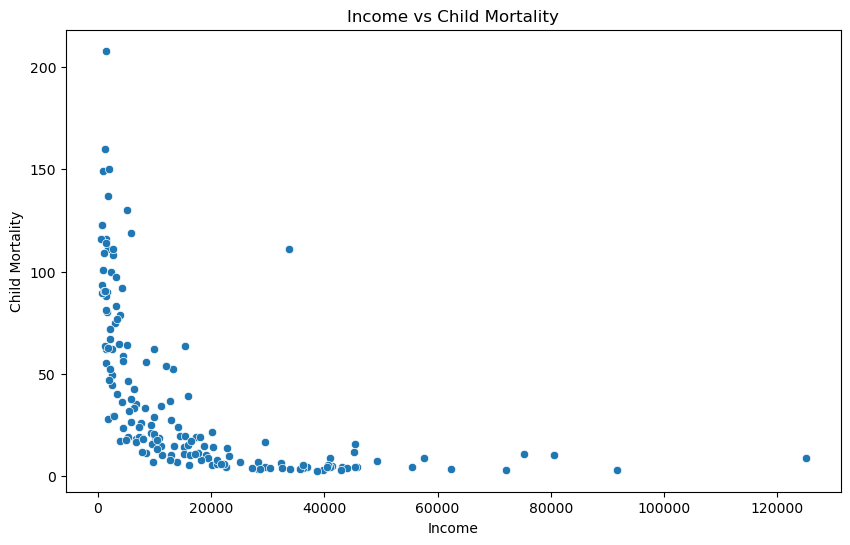

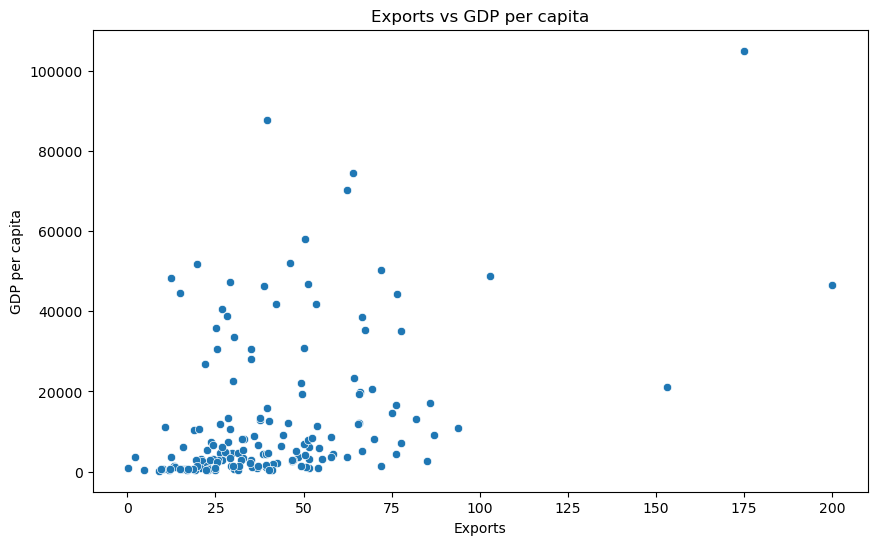

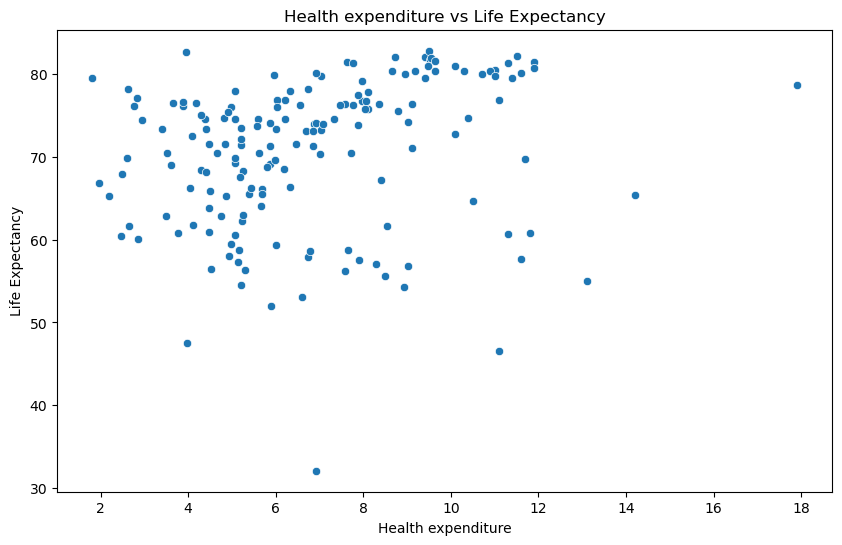

In [58]:
# Scatter Plot Visualizations

# GDP vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Life Expectancy', data=df_cleaned)
plt.title('GDP per capita vs Life Expectancy')
plt.xlabel('GDP per capita')
plt.ylabel('Life Expectancy')
plt.show()

# Income vs Child Mortality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Child Mortality', data=df_cleaned)
plt.title('Income vs Child Mortality')
plt.xlabel('Income')
plt.ylabel('Child Mortality')
plt.show()

# Exports vs GDP per capita
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Exports', y='GDP per capita', data=df_cleaned)
plt.title('Exports vs GDP per capita')
plt.xlabel('Exports')
plt.ylabel('GDP per capita')
plt.show()

# Health expenditure vs Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Health', y='Life Expectancy', data=df_cleaned)
plt.title('Health expenditure vs Life Expectancy')
plt.xlabel('Health expenditure')
plt.ylabel('Life Expectancy')
plt.show()

C:\Users\ifrid\AppData\Local\Temp\ipykernel_24584\2207686882.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




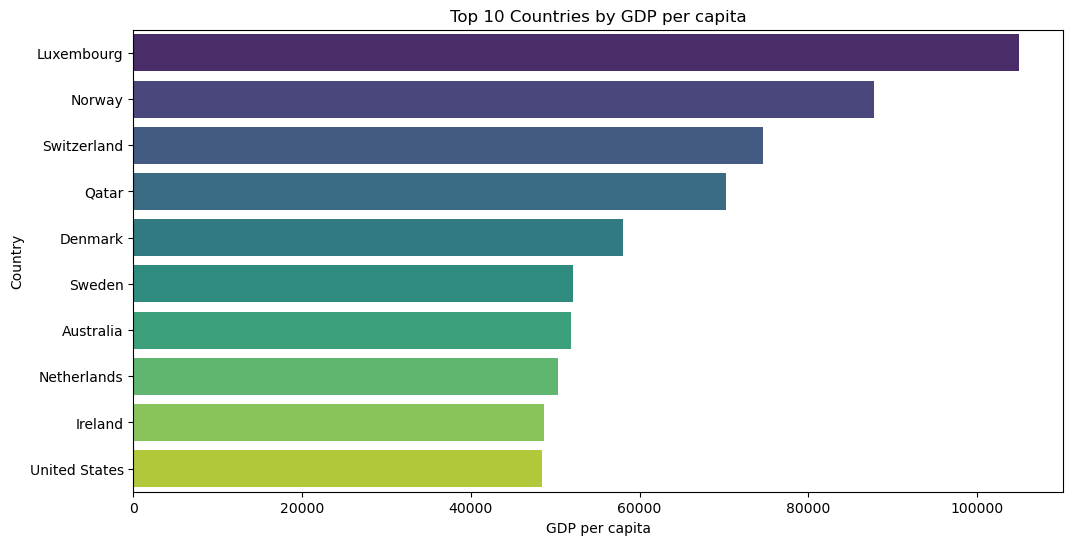

C:\Users\ifrid\AppData\Local\Temp\ipykernel_24584\2207686882.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




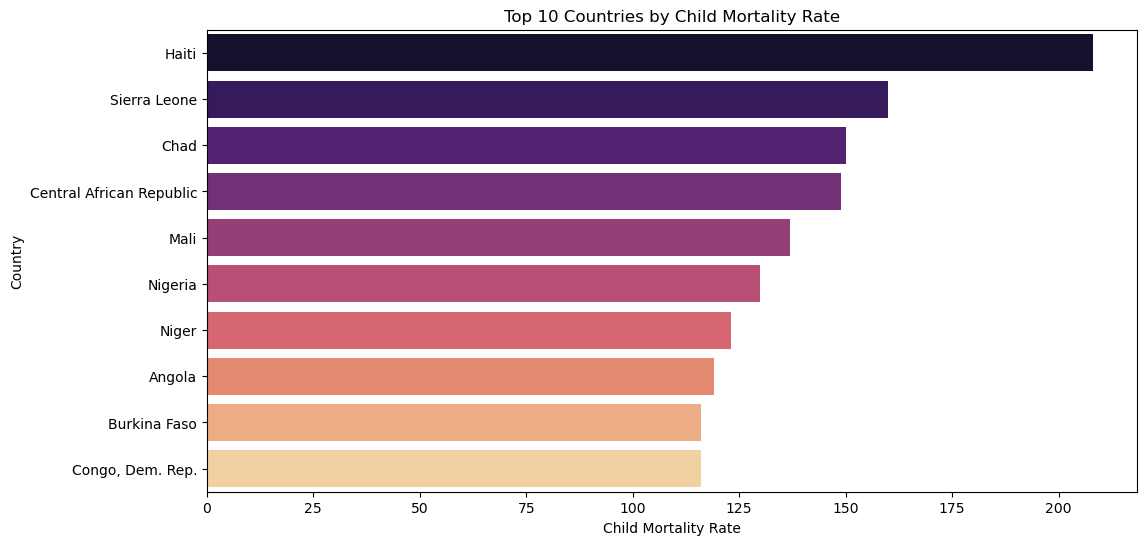

In [59]:
# Bar Plots

# Top 10 countries by GDP per capita
top_10_gdp = df_cleaned.nlargest(10, 'GDP per capita')
plt.figure(figsize=(12, 6))
sns.barplot(x='GDP per capita', y='Country', data=top_10_gdp, palette='viridis')
plt.title('Top 10 Countries by GDP per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Country')
plt.show()

# Top 10 countries by Child Mortality Rate
top_10_child_mortality = df_cleaned.nlargest(10, 'Child Mortality')
plt.figure(figsize=(12, 6))
sns.barplot(x='Child Mortality', y='Country', data=top_10_child_mortality, palette='magma')
plt.title('Top 10 Countries by Child Mortality Rate')
plt.xlabel('Child Mortality Rate')
plt.ylabel('Country')
plt.show()


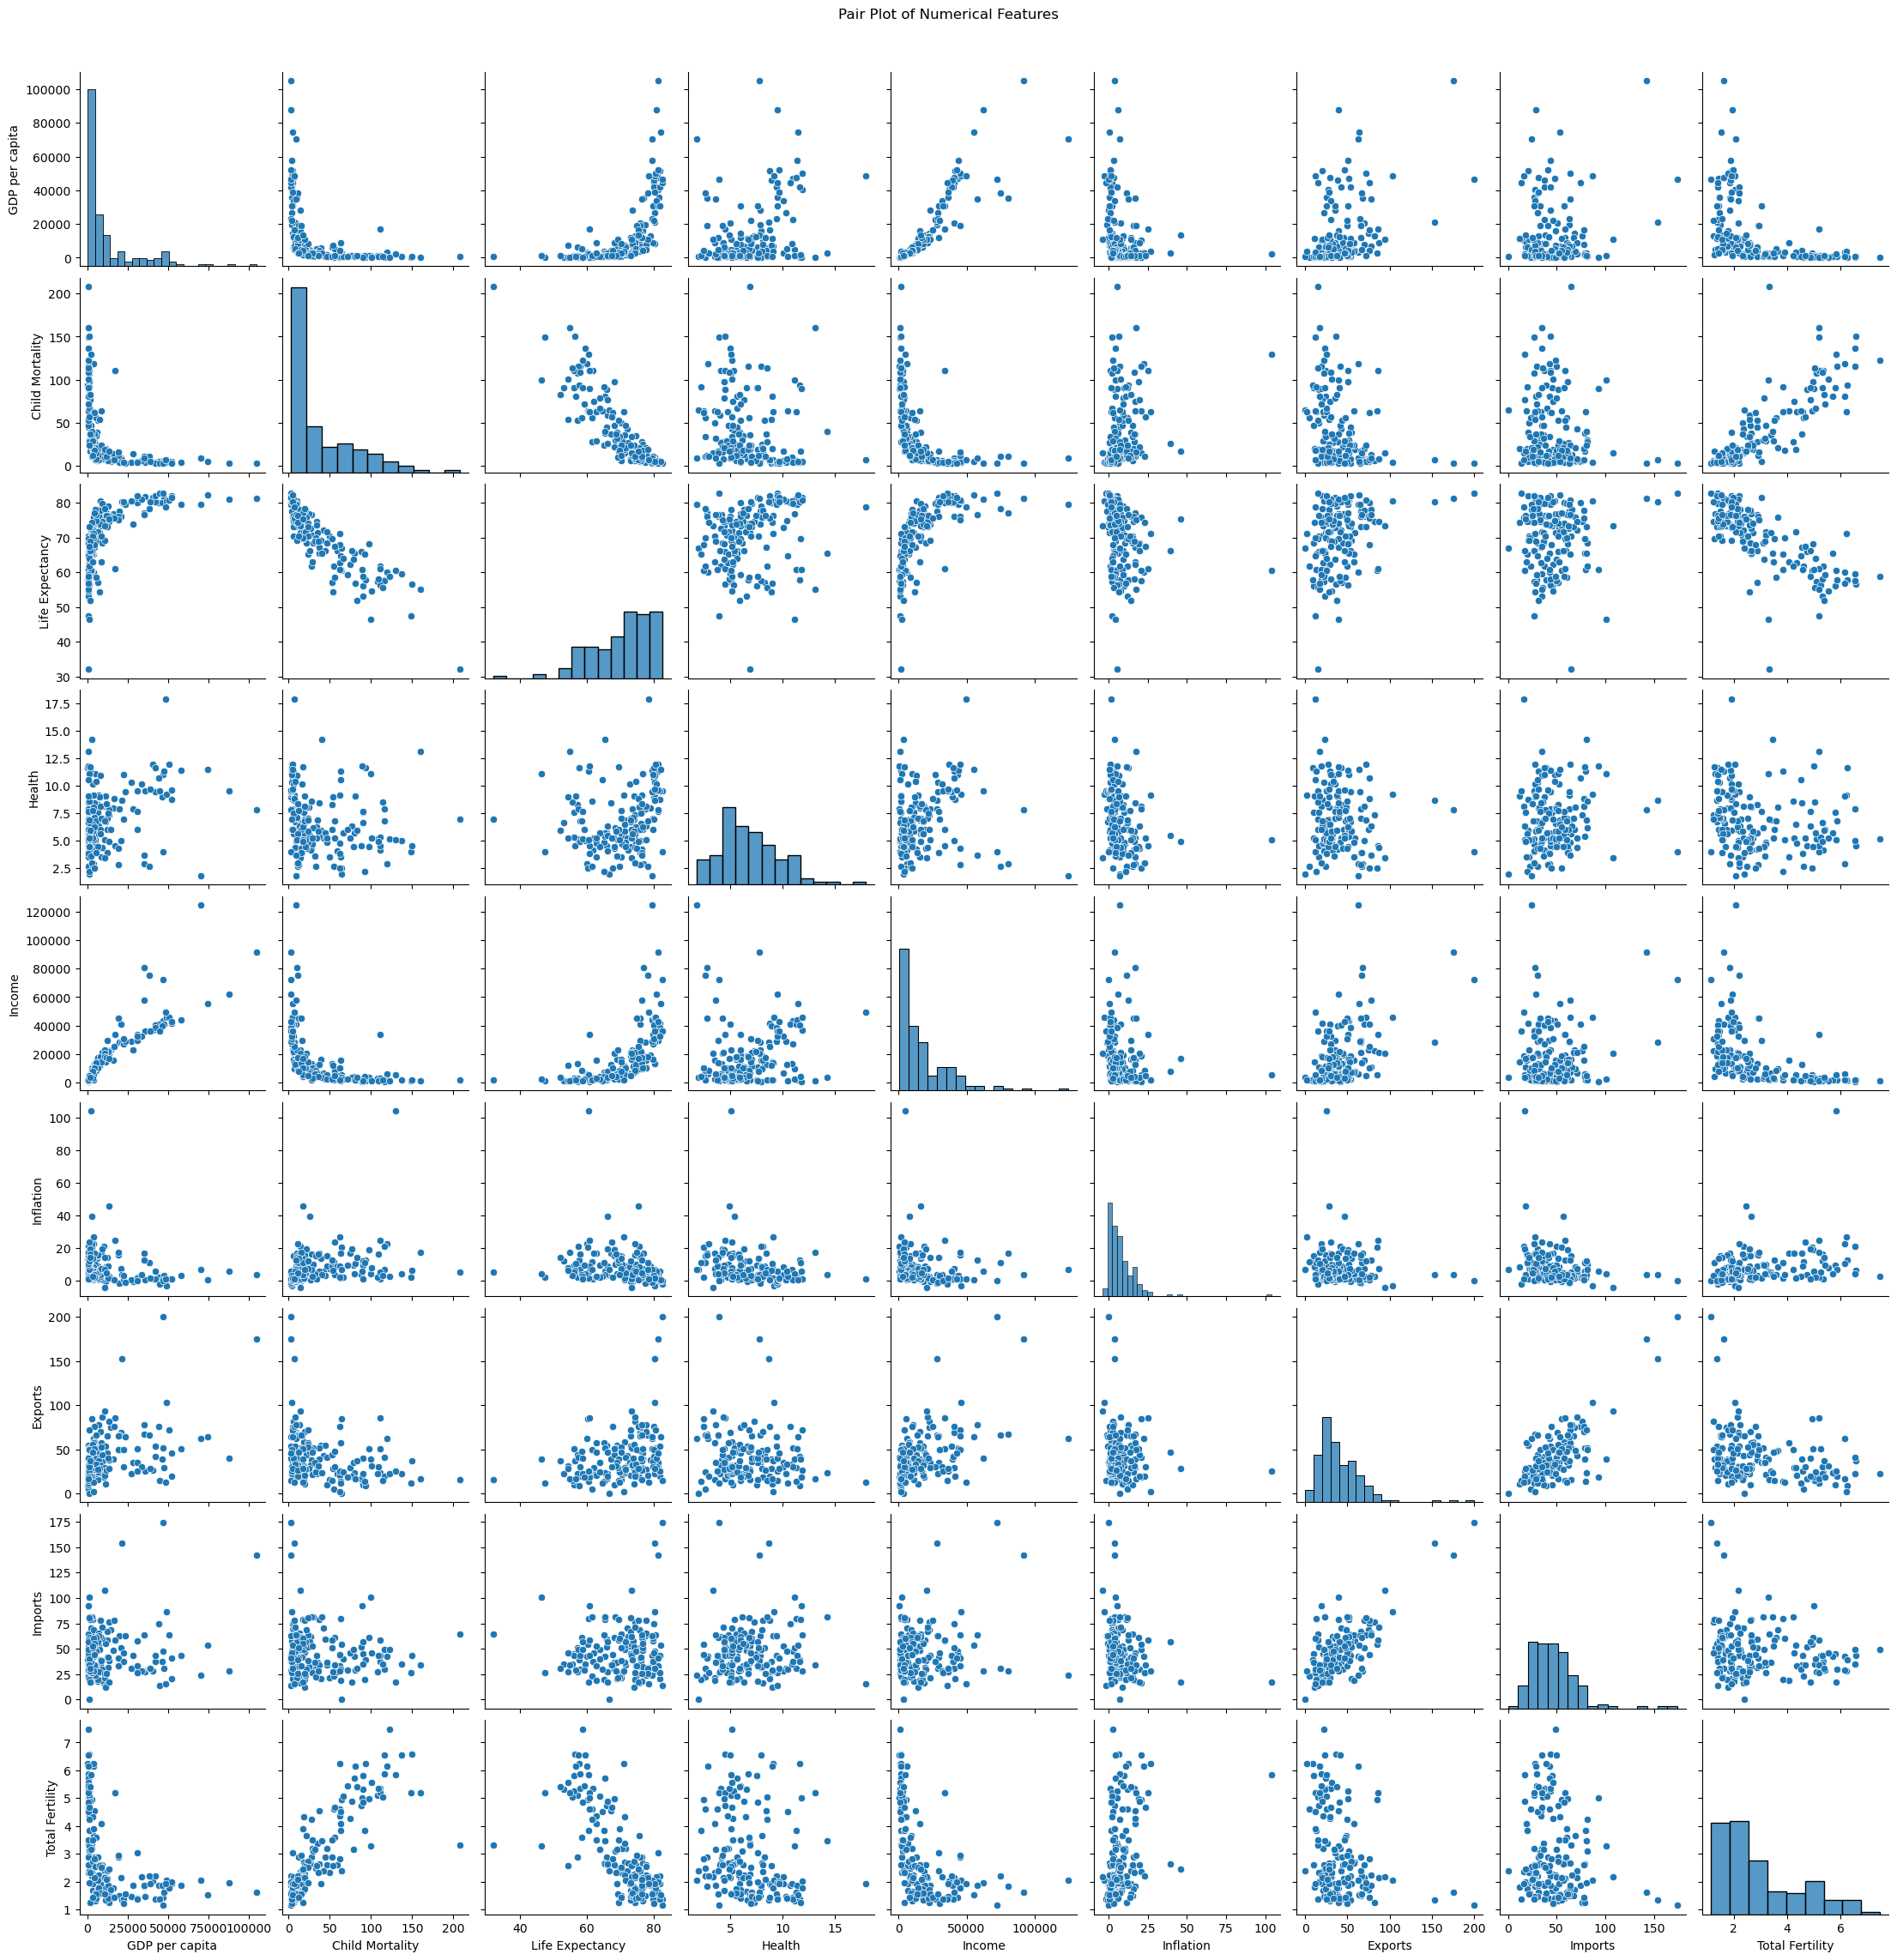

In [60]:
# Pair Plot Visualizations

# Select numerical features for the pair plot
numerical_features = df_cleaned[['GDP per capita', 'Child Mortality', 'Life Expectancy', 'Health', 'Income', 'Inflation', 'Exports', 'Imports', 'Total Fertility']]

# Create the pair plot
sns.pairplot(numerical_features)
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

In [61]:


# Create a choropleth map for GDP per capita
fig_gdp = px.choropleth(df_cleaned, locations="Country", locationmode="country names",
                        color="GDP per capita", hover_name="Country", 
                        color_continuous_scale=px.colors.sequential.Plasma)
fig_gdp.update_layout(title_text='GDP per capita Distribution')
fig_gdp.show()

# Create a choropleth map for Child Mortality
fig_child_mortality = px.choropleth(df_cleaned, locations="Country", locationmode="country names",
                                    color="Child Mortality", hover_name="Country", 
                                    color_continuous_scale=px.colors.sequential.Plasma)
fig_child_mortality.update_layout(title_text='Child Mortality Distribution')
fig_child_mortality.show()

# Create a choropleth map for Life Expectancy
fig_life_expectancy = px.choropleth(df_cleaned, locations="Country", locationmode="country names",
                                    color="Life Expectancy", hover_name="Country", 
                                    color_continuous_scale=px.colors.sequential.Plasma)
fig_life_expectancy.update_layout(title_text='Life Expectancy Distribution')
fig_life_expectancy.show()